In [10]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = forest_fires_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [11]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'])
data_5 = data_processor.log_transform(data_4)

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [12]:
data_5

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.007337,0.569309,-1.966538,0.357375,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,0.000000
1,1.007337,-0.243765,1.109046,-1.089853,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,0.000000
2,1.007337,-0.243765,1.109046,0.839784,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,0.000000
3,1.439531,1.382383,-1.966538,0.357375,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,0.000000
4,1.439531,1.382383,-1.966538,1.322193,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289244,-1.056839,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.753070,-0.735411,-0.073197,2.006871
513,-1.153631,-0.243765,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,0.518517,1.637006,0.994835,-0.073197,4.012592
514,1.007337,-0.243765,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.575722,1.497164,-0.073197,2.498152
515,-1.585825,-0.243765,0.230308,0.839784,0.680298,0.548471,0.269122,0.499693,1.155720,-0.140230,-0.009824,-0.073197,0.000000


In [13]:
data_train, data_val = cross_validator.random_partition(data_4, random_state=42)

In [14]:
data = data_train.to_numpy()
X_train = data[:,:-1]
y_train = data[:,-1:]

In [15]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-1]
y_val = data_test[:,-1:]

In [16]:
y_val[0]

array([0.])

In [17]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=4)

autoE.train(X_train, max_epochs=30000, lr=0.0001)

Epoch 0/30000, Loss: 1.0099018431584819
Epoch 1/30000, Loss: 1.0098279500573843
Epoch 2/30000, Loss: 1.0097654237561904
Epoch 3/30000, Loss: 1.009712426455432
Epoch 4/30000, Loss: 1.0096674146427964
Epoch 5/30000, Loss: 1.009629091755058
Epoch 6/30000, Loss: 1.00959636845582
Epoch 7/30000, Loss: 1.009568329301029
Epoch 8/30000, Loss: 1.0095442047628214
Epoch 9/30000, Loss: 1.009523347748578
Epoch 10/30000, Loss: 1.0095052138913874
Epoch 11/30000, Loss: 1.0094893450048597
Epoch 12/30000, Loss: 1.0094753551931006
Epoch 13/30000, Loss: 1.0094629191886761
Epoch 14/30000, Loss: 1.009451762560181
Epoch 15/30000, Loss: 1.0094416534887196
Epoch 16/30000, Loss: 1.0094323958609666
Epoch 17/30000, Loss: 1.0094238234670678
Epoch 18/30000, Loss: 1.0094157951256817
Epoch 19/30000, Loss: 1.0094081905870085
Epoch 20/30000, Loss: 1.0094009070886365
Epoch 21/30000, Loss: 1.0093938564591172
Epoch 22/30000, Loss: 1.0093869626810694
Epoch 23/30000, Loss: 1.0093801598397554
Epoch 24/30000, Loss: 1.009373390

In [ ]:
combined = CombinedModel(autoE,n_hidden_2=24,n_output=1)

MSEs, val_metrics, final_mse = combined.train(X_train,y_train,X_val,y_val,epochs=3000,lr=0.00001)

In [18]:
combined = CombinedModel(autoE,n_hidden_2=100,n_output=1)

MSEs, val_metrics, final_mse = combined.train(X_train,y_train,X_val,y_val,epochs=5000,lr=0.000001)

Epoch 0/5000, Train MSE: 2203.3488662358623, Val MSE: 12173.809230996772
Epoch 100/5000, Train MSE: 2193.14352592037, Val MSE: 12155.611922809621
Epoch 200/5000, Train MSE: 2182.811623115064, Val MSE: 12136.815790693916
Epoch 300/5000, Train MSE: 2170.412450727026, Val MSE: 12113.692552914736
Epoch 400/5000, Train MSE: 2151.591462108276, Val MSE: 12077.181849161225
Epoch 500/5000, Train MSE: 2122.0353793726595, Val MSE: 12015.008355527687
Epoch 600/5000, Train MSE: 2090.2959594296403, Val MSE: 11935.461764518504
Epoch 700/5000, Train MSE: 2072.419859689513, Val MSE: 11873.604316333645
Epoch 800/5000, Train MSE: 2065.965697150604, Val MSE: 11840.74955281505
Epoch 900/5000, Train MSE: 2063.110255562724, Val MSE: 11825.008480144552
Epoch 1000/5000, Train MSE: 2061.0517040066243, Val MSE: 11816.552722058364
Epoch 1100/5000, Train MSE: 2059.1821318610496, Val MSE: 11810.931495317034
Epoch 1200/5000, Train MSE: 2057.350203435405, Val MSE: 11806.401459350018
Epoch 1300/5000, Train MSE: 2055.4

In [19]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=20,n_hidden_2=50,n_output=1)

MSEs, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,5000,0.000001)

Epoch 0/5000, Train MSE: 2203.4712091351957, Val MSE: 12174.02681915386
Epoch 100/5000, Train MSE: 2193.63038934932, Val MSE: 12156.489938436267
Epoch 200/5000, Train MSE: 2184.548603724392, Val MSE: 12140.005724466713
Epoch 300/5000, Train MSE: 2176.1372971217947, Val MSE: 12124.448249652214
Epoch 400/5000, Train MSE: 2168.289243473981, Val MSE: 12109.648629071105
Epoch 500/5000, Train MSE: 2160.856227705086, Val MSE: 12095.347716382646
Epoch 600/5000, Train MSE: 2153.611706405782, Val MSE: 12081.11364118968
Epoch 700/5000, Train MSE: 2146.187617906806, Val MSE: 12066.197362621404
Epoch 800/5000, Train MSE: 2137.959606696668, Val MSE: 12049.265834446926
Epoch 900/5000, Train MSE: 2127.779813768455, Val MSE: 12027.794225362766
Epoch 1000/5000, Train MSE: 2113.231469192217, Val MSE: 11996.314848130838
Epoch 1100/5000, Train MSE: 2090.715745976044, Val MSE: 11944.594408453153
Epoch 1200/5000, Train MSE: 2066.602726759681, Val MSE: 11878.091304769516
Epoch 1300/5000, Train MSE: 2053.18377

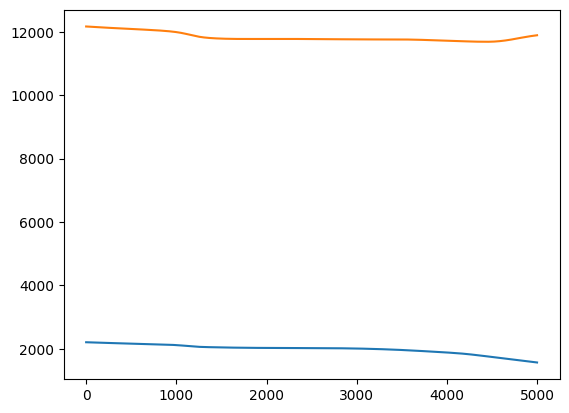

In [20]:
import matplotlib.pyplot as plt

plt.plot(MSEs)
plt.plot(val_metrics)

In [21]:
linear = LinearNetwork(config)

losses = linear.linear_regression(X_train,y_train,X_val,y_val)

Epoch 0/1000, Training MSE: 2203.227401623028, Validation MSE: 12158.917938725497
Epoch 100/1000, Training MSE: 2016.0341561041919, Validation MSE: 11787.95343687276
Epoch 200/1000, Training MSE: 2009.2289388721572, Validation MSE: 11760.594792510336
Epoch 300/1000, Training MSE: 2007.5160057220396, Validation MSE: 11758.044019056502
Epoch 400/1000, Training MSE: 2006.5620720615334, Validation MSE: 11758.017764550346
Epoch 500/1000, Training MSE: 2005.9128512742839, Validation MSE: 11758.07548080026
Epoch 600/1000, Training MSE: 2005.4455930049373, Validation MSE: 11758.056641173365
Epoch 700/1000, Training MSE: 2005.1035271707703, Validation MSE: 11758.002121466008
Epoch 800/1000, Training MSE: 2004.8515909992836, Validation MSE: 11757.939409441738
Epoch 900/1000, Training MSE: 2004.6655504445018, Validation MSE: 11757.879570750516


In [22]:
_,_,output = ffn.forward_pass(X_val)

In [23]:
output

array([[  1.40962617],
       [  2.4899942 ],
       [ 32.37335525],
       [ -5.82974078],
       [  1.31949031],
       [ -6.36903365],
       [ 24.44355828],
       [  7.25555321],
       [ -6.77739728],
       [  0.08009623],
       [ 11.99828789],
       [  3.66958376],
       [ 22.97694507],
       [  1.56725935],
       [ 22.08811964],
       [ -3.79925273],
       [ 31.12471819],
       [ -6.37273843],
       [ 41.3817508 ],
       [  1.28918074],
       [ 12.20466804],
       [ -8.74869559],
       [  4.32544243],
       [ 19.79049971],
       [-10.83354028],
       [ 38.16154404],
       [ 10.28115441],
       [ 24.118897  ],
       [ 12.93295619],
       [  8.94425394],
       [ -5.4519732 ],
       [ 16.28496812],
       [ 10.36680048],
       [ 29.15719709],
       [  3.79538023],
       [ -9.51174339],
       [ -9.75115231],
       [  2.22993698],
       [ 24.92639181],
       [  6.66415537],
       [ 29.81339528],
       [ 15.06334174],
       [-16.86205364],
       [ -2

In [24]:
MSE = np.mean((y_val-output)**2)

In [25]:
MSE

11690.946614394501

In [26]:
np.min(val_metrics)

11690.946614394501